In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the main files
books = pd.read_csv("dataset/raw/books.csv")
ratings = pd.read_csv("dataset/raw/ratings.csv")
book_tags = pd.read_csv("dataset/raw/book_tags.csv")
tags = pd.read_csv("dataset/raw/tags.csv")
to_read = pd.read_csv("dataset/raw/to_read.csv")

In [3]:
# Check the first few rows and basic info
print("Books Data:")
print(books.info(),"\n")

print("Ratings Data:")
print(ratings.info(),"\n")

print("Book Tags Data:")
print(book_tags.info(), "\n")

print("Tags Data:")
print(tags.info(), "\n")

print("To Read Data:")
print(to_read.info(),"\n")


Books Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 no

In [4]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [7]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [8]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [9]:
print("Missing values:\n")
print("Books:\n", books.isnull().sum(), "\n")
print("Ratings:\n", ratings.isnull().sum(), "\n")
print("Book Tags:\n", book_tags.isnull().sum(), "\n")
print("Tags:\n", tags.isnull().sum(), "\n")
print("To Read:\n", to_read.isnull().sum(), "\n")

Missing values:

Books:
 id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64 

Ratings:
 book_id    0
user_id    0
rating     0
dtype: int64 

Book Tags:
 goodreads_book_id    0
tag_id               0
count                0
dtype: int64 

Tags:
 tag_id     

In [10]:
# Normalize ratings using Min-Max Scaling (0 to 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ratings['normalized_rating'] = scaler.fit_transform(ratings[['rating']])

# Optional: show a few samples
ratings[['user_id', 'book_id', 'rating', 'normalized_rating']].head()

,user_id,book_id,rating,normalized_rating
0,314,1,5,1.00
1,439,1,3,0.50
2,588,1,5,1.00
3,1169,1,4,0.75
4,1185,1,4,0.75


In [11]:
# Check missing values
print(books.isnull().sum())
print(ratings.isnull().sum())
print(book_tags.isnull().sum())
print(tags.isnull().sum())
print(to_read.isnull().sum())

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
book_id              0
user_id              0
rating               0
normalized_rating    0
dtype: int64
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
tag_id      0
tag_

In [12]:
books['isbn'] = books['isbn'].fillna('0000000000')
books['isbn13'] = books['isbn13'].fillna('0000000000000').astype(str)
books['original_title'] = books['original_title'].fillna(books['title'])
books['original_publication_year'] = books['original_publication_year'].fillna(books['original_publication_year'].median())
books['language_code'] = books['language_code'].fillna('unknown')

In [13]:
print("After Preprocessing:")
print(books.isnull().sum())
print(ratings.isnull().sum())
print(book_tags.isnull().sum())
print(tags.isnull().sum())
print(to_read.isnull().sum())

After Preprocessing:
id                           0
book_id                      0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64
book_id              0
user_id              0
rating               0
normalized_rating    0
dtype: int64
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
tag_id      0
tag_name    0
dtype: int64
user_id    0
book_id    0

In [14]:
books.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
book_tags.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)
to_read.drop_duplicates(inplace=True)

In [15]:
ratings = ratings[ratings['book_id'].isin(books['book_id'])]
to_read = to_read[to_read['book_id'].isin(books['book_id'])]
book_tags = book_tags[book_tags['goodreads_book_id'].isin(books['book_id'])]

In [16]:
print(books.columns)


Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')


In [17]:
# Merge book_tags with tags
tagged_books = pd.merge(book_tags, tags, on="tag_id", how="left")

In [18]:
tagged_books

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult
...,...,...,...,...
999901,33288638,21303,7,neighbors
999902,33288638,17271,7,kindleunlimited
999903,33288638,1126,7,5-star-reads
999904,33288638,11478,7,fave-author


In [19]:
# Merge book_tags with tags
book_tags_merged = pd.merge(book_tags, tags, on='tag_id', how='left')

# Optional: Merge with books for enriched data
book_tags_full = (
    book_tags
    .merge(tags, on='tag_id', how='left')
    .merge(books, left_on='goodreads_book_id', right_on='best_book_id', how='inner')
)

book_tags_full[['title', 'tag_name', 'count']].head()


,title,tag_name,count
0,Harry Potter and the Half-Blood Prince (Harry ...,to-read,167697
1,Harry Potter and the Half-Blood Prince (Harry ...,fantasy,37174
2,Harry Potter and the Half-Blood Prince (Harry ...,favorites,34173
3,Harry Potter and the Half-Blood Prince (Harry ...,currently-reading,12986
4,Harry Potter and the Half-Blood Prince (Harry ...,young-adult,12716


In [20]:
tags_per_book = (
    book_tags_full
    .groupby('book_id')['tag_name']
    .apply(lambda s: ' '.join(s.fillna('').astype(str)))
    .reset_index())
tags_per_book.head()

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read currently-reading fantasy favorites ch...
2,3,to-read favorites fantasy currently-reading yo...
3,5,favorites fantasy currently-reading young-adul...
4,6,fantasy young-adult fiction harry-potter owned...


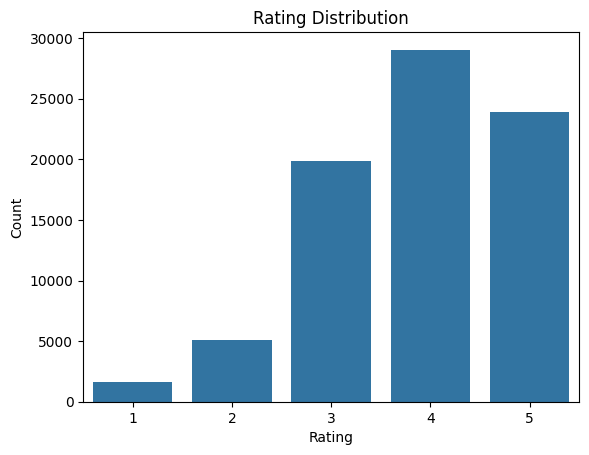

In [21]:
# Ratings distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\subhr\AppData\Local\Temp\ipykernel_20140\4234415688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='num_ratings', data=top_books_merged, palette='plasma')


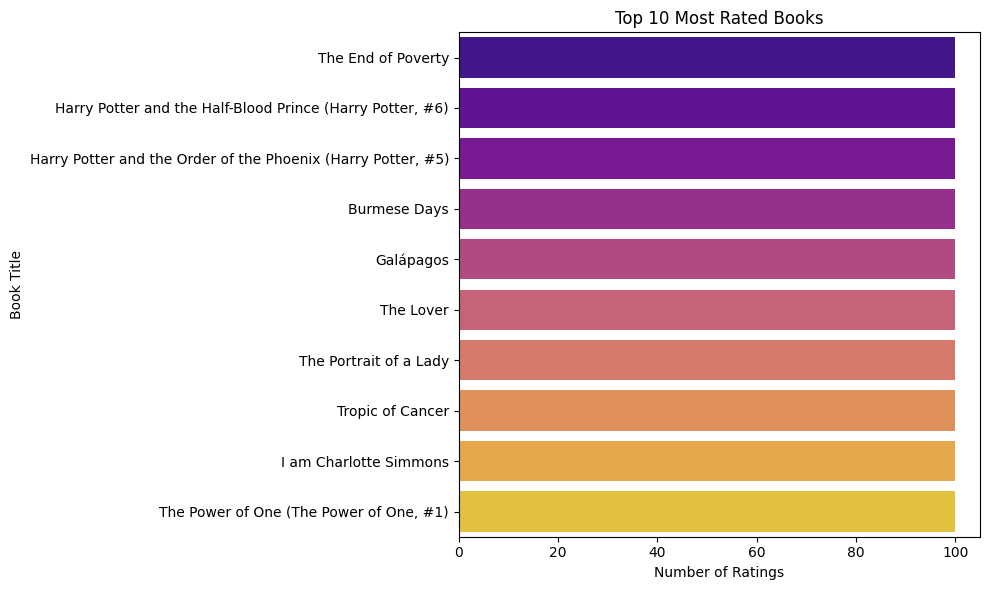

In [22]:
# Step 1: Get top 10 most rated book IDs from ratings
top_book_ids = ratings['book_id'].value_counts().head(10)
top_books_df = top_book_ids.reset_index()
top_books_df.columns = ['book_id', 'num_ratings']  # renamed to avoid column clash

# Step 2: Merge with books to get titles and authors
top_books_merged = top_books_df.merge(books, on='book_id')

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='num_ratings', data=top_books_merged, palette='plasma')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


C:\Users\subhr\AppData\Local\Temp\ipykernel_20140\1856008545.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='average_rating', data=top_rated, palette='viridis')


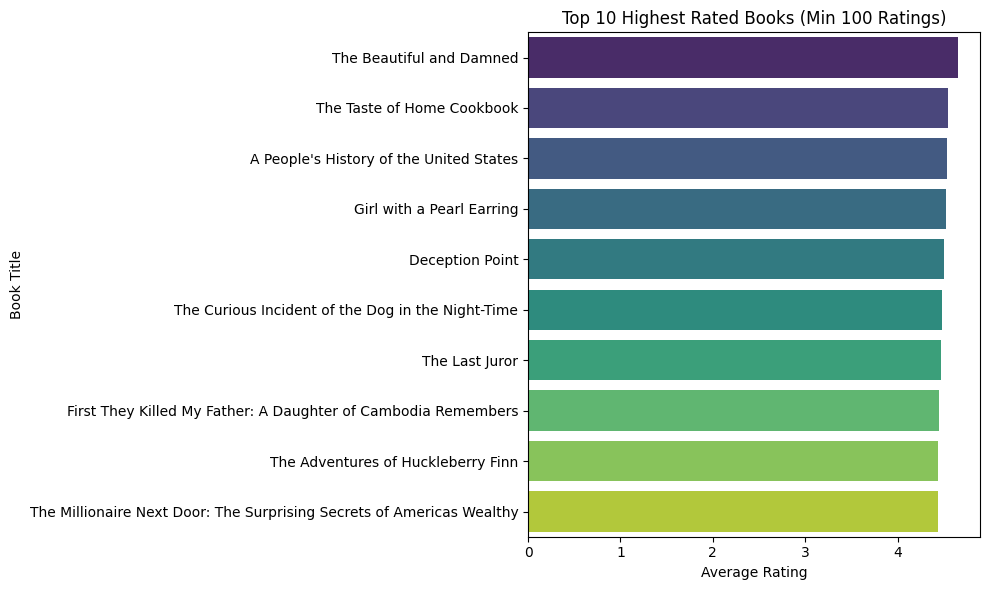

In [23]:
# Step 1: Calculate mean ratings and rating counts
mean_ratings = ratings.groupby('book_id')['rating'].mean()
ratings_count = ratings['book_id'].value_counts()

# Step 2: Filter only books with 100+ ratings
popular_books = mean_ratings[ratings_count >= 100].sort_values(ascending=False).head(10)

# Step 3: Get titles and authors (including book_id this time)
top_rated = books[books['book_id'].isin(popular_books.index)][['book_id', 'title', 'authors']]

# Step 4: Map the average ratings back
top_rated['average_rating'] = top_rated['book_id'].map(mean_ratings)

# Step 5: Sort and Plot
top_rated = top_rated.sort_values('average_rating', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='average_rating', data=top_rated, palette='viridis')

plt.title('Top 10 Highest Rated Books (Min 100 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

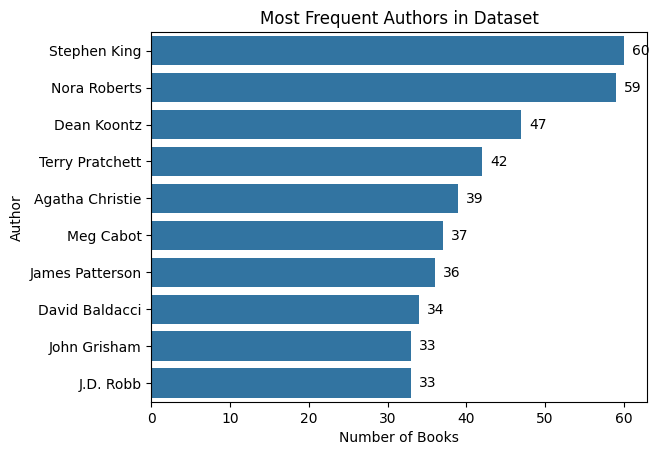

In [24]:
popular_authors = books['authors'].value_counts().head(10)
sns.barplot(y=popular_authors.index, x=popular_authors.values)
plt.title('Most Frequent Authors in Dataset')
plt.xlabel('Number of Books')
plt.ylabel('Author')
# Add value labels to bars
for i, value in enumerate(popular_authors.values):
    plt.text(value + 1, i, str(value), va='center')  # va = vertical alignment
plt.show()

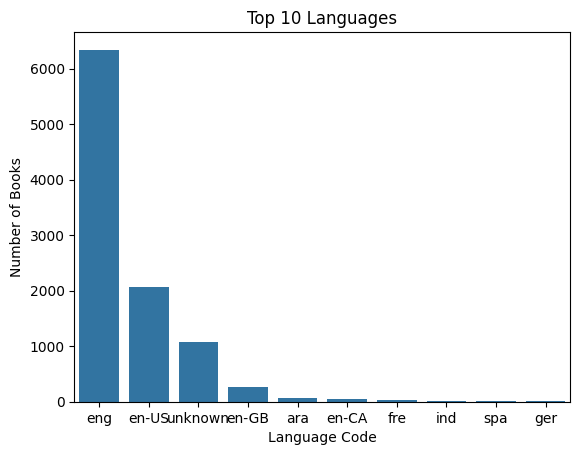

In [25]:
lang_counts = books['language_code'].value_counts().head(10)
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title('Top 10 Languages')
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.show()

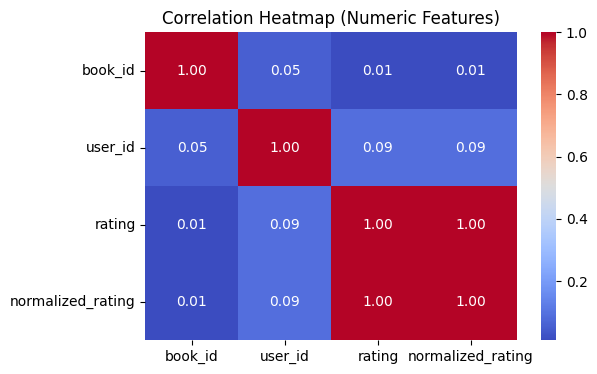

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# If you have a ratings DataFrame with numeric fields (e.g., rating, normalized_rating)
numeric_cols = ratings.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

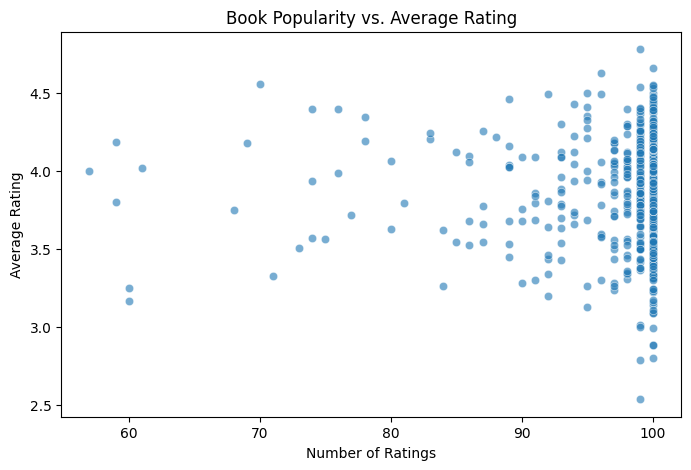

In [27]:
# Popularity = number of ratings per book
book_popularity = ratings.groupby('book_id').size().reset_index(name='rating_count')
book_avg_rating = ratings.groupby('book_id')['rating'].mean().reset_index(name='avg_rating')

popularity_df = book_popularity.merge(book_avg_rating, on='book_id')

plt.figure(figsize=(8,5))
sns.scatterplot(data=popularity_df, x='rating_count', y='avg_rating', alpha=0.6)
plt.title("Book Popularity vs. Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

In [28]:
# Basic statistical summaries for ratings
print("Overall Rating Stats:")
print(ratings['rating'].describe())

# Ratings per book
book_stats = ratings.groupby('book_id')['rating'].agg(['count', 'mean', 'median', 'std']).reset_index()
book_stats.rename(columns={'count': 'num_ratings', 'mean': 'avg_rating', 'std': 'std_dev'}, inplace=True)

print("\nSample Book Rating Stats:")
print(book_stats.head())

# Ratings per user
user_stats = ratings.groupby('user_id')['rating'].agg(['count', 'mean', 'median', 'std']).reset_index()
user_stats.rename(columns={'count': 'num_ratings', 'mean': 'avg_rating', 'std': 'std_dev'}, inplace=True)

print("\nSample User Rating Stats:")
print(user_stats.head())

Overall Rating Stats:
count    79583.000000
mean         3.861151
std          0.985824
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Sample Book Rating Stats:
   book_id  num_ratings  avg_rating  median   std_dev
0        1          100        4.24     4.0  0.888990
1        2          100        4.21     4.5  1.037625
2        3          100        3.09     3.0  1.470896
3        5          100        3.89     4.0  1.072098
4        6          100        4.09     4.0  1.045384

Sample User Rating Stats:
   user_id  num_ratings  avg_rating  median   std_dev
0        2            1         4.0     4.0       NaN
1        3            1         1.0     1.0       NaN
2        4            1         2.0     2.0       NaN
3        7            4         4.0     4.0  1.154701
4        9            1         4.0     4.0       NaN


In [29]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9780439023480.0,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9780439554930.0,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9780316015840.0,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9780061120080.0,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9780743273560.0,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [30]:
ratings.head()

,book_id,user_id,rating,normalized_rating
0,1,314,5,1.00
1,1,439,3,0.50
2,1,588,5,1.00
3,1,1169,4,0.75
4,1,1185,4,0.75


In [31]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [32]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [33]:
to_read.head()

,user_id,book_id
0,1,112
8,2,11
9,2,13
12,2,106
23,2,1371


In [34]:
book_tags_full.head(50)

,goodreads_book_id,tag_id,count,tag_name,id,book_id,best_book_id,work_id,books_count,isbn,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,30574,167697,to-read,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,1,11305,37174,fantasy,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
2,1,11557,34173,favorites,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
3,1,8717,12986,currently-reading,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
4,1,33114,12716,young-adult,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
5,1,11743,9954,fiction,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
6,1,14017,7169,harry-potter,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
7,1,5207,6221,books-i-own,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
8,1,22743,4974,owned,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
9,1,32989,4364,ya,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...


In [35]:
# Save the cleaned and processed dataframes to new CSV files
books.to_csv('cleaned_books.csv', index=False)
ratings.to_csv('cleaned_ratings.csv', index=False)
book_tags_full.to_csv('cleaned_book_tags.csv', index=False)
to_read.to_csv('cleaned_to_read.csv', index=False)
tagged_books.to_csv('tagged_books.csv', index=False)


In [36]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Load cleaned ratings
ratings = pd.read_csv("cleaned_ratings.csv")

# Reader (rating scale from 1–5)
reader = Reader(rating_scale=(1, 5))

# Use full dataset (but you can sample for user-based CF to avoid memory issues)
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

ModuleNotFoundError: No module named 'surprise'

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Load cleaned ratings
ratings = pd.read_csv("cleaned_ratings.csv")

# Reader with rating scale
reader = Reader(rating_scale=(1, 5))

# ---------------------------
# ITEM-BASED COLLABORATIVE FILTERING
# ---------------------------
print("\n🔹 Item-Based CF (Full Dataset)")
data_item = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)
trainset_item, testset_item = train_test_split(data_item, test_size=0.2)

sim_options_item = {'name': 'cosine', 'user_based': False}   # Item-based
item_cf = KNNBasic(sim_options=sim_options_item, verbose=True)
item_cf.fit(trainset_item)
predictions_item = item_cf.test(testset_item)

print("Item-Based CF Results:")
accuracy.rmse(predictions_item)
accuracy.mae(predictions_item)


# ---------------------------
# USER-BASED COLLABORATIVE FILTERING (on sample to avoid memory error)
# ---------------------------
print("\n🔹 User-Based CF (Sampled Dataset)")

# Take 10% of ratings for user-based (to reduce matrix size)
sampled_ratings = ratings.sample(frac=0.1, random_state=42)
data_user = Dataset.load_from_df(sampled_ratings[['user_id', 'book_id', 'rating']], reader)
trainset_user, testset_user = train_test_split(data_user, test_size=0.2)

sim_options_user = {'name': 'cosine', 'user_based': True}    # User-based
user_cf = KNNBasic(sim_options=sim_options_user, verbose=True)
user_cf.fit(trainset_user)
predictions_user = user_cf.test(testset_user)

print("User-Based CF Results (on sample):")
accuracy.rmse(predictions_user)
accuracy.mae(predictions_user)


In [ ]:
from surprise import SVD, NMF

# SVD
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset)
print("SVD")
accuracy.rmse(predictions_svd)
accuracy.mae(predictions_svd)

# NMF
nmf = NMF()
nmf.fit(trainset)
predictions_nmf = nmf.test(testset)
print("NMF")
accuracy.rmse(predictions_nmf)
accuracy.mae(predictions_nmf)

In [ ]:
from collections import defaultdict

# Function to get Top-N predictions
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Precision, Recall, F1 at K
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions, recalls, f1s = [], [], []

    for uid, user_ratings in user_est_true.items():
        # Sort by estimated rating
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)     # all relevant
        n_rel_and_rec = sum((true_r >= threshold) for (_, true_r) in top_k)    # relevant in top-k

        prec = n_rel_and_rec / k if k else 0
        rec = n_rel_and_rec / n_rel if n_rel else 0
        f1 = (2 * prec * rec / (prec + rec)) if (prec + rec) > 0 else 0

        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)

    return (sum(precisions) / len(precisions),
            sum(recalls) / len(recalls),
            sum(f1s) / len(f1s))

# Evaluate all models
for name, preds in [
    ("User CF", predictions_user),
    ("Item CF", predictions_item),
    ("SVD", predictions_svd),
    ("NMF", predictions_nmf)
]:
    p, r, f1 = precision_recall_at_k(preds, k=10, threshold=3.5)
    print(f"{name} -> Precision@10: {p:.4f}, Recall@10: {r:.4f}, F1@10: {f1:.4f}")


In [2]:
# Week 3: Content-Based Recommendation System
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import re

# Load your cleaned data
books = pd.read_csv("dataset/processed/cleaned_books.xls")
ratings = pd.read_csv("dataset/processed/cleaned_ratings.xls")
book_tags_full = pd.read_csv("dataset/processed/cleaned_book_tags.xls")
tagged_books = pd.read_csv("dataset/processed/tagged_books.xls")

# ========================
# 1. CONTENT-BASED RECOMMENDATION SYSTEM
# ========================

def preprocess_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Create content features for books
def create_content_features(books_df, book_tags_df):
    """
    Create content-based features by combining:
    - Book titles
    - Authors
    - Tags/genres
    """
    content_df = books_df.copy()
    
    # Preprocess text fields
    content_df['clean_title'] = content_df['title'].apply(preprocess_text)
    content_df['clean_authors'] = content_df['authors'].apply(preprocess_text)
    
    # Get tags for each book
    book_tags_agg = (book_tags_df.groupby('book_id')['tag_name']
                     .apply(lambda x: ' '.join(x.fillna('').astype(str)))
                     .reset_index())
    
    # Merge tags with books
    content_df = content_df.merge(book_tags_agg, on='book_id', how='left')
    content_df['tag_name'] = content_df['tag_name'].fillna('')
    content_df['clean_tags'] = content_df['tag_name'].apply(preprocess_text)
    
    # Combine all text features
    content_df['combined_features'] = (
        content_df['clean_title'] + ' ' + 
        content_df['clean_authors'] + ' ' + 
        content_df['clean_tags']
    )
    
    return content_df

# Create content features
content_books = create_content_features(books, book_tags_full)
print("Content features created!")
print(f"Sample combined features:\n{content_books[['title', 'combined_features']].head()}")

# ========================
# 2. TF-IDF VECTORIZATION
# ========================

# Create TF-IDF matrix
tfidf = TfidfVectorizer(
    max_features=5000,      # Limit features to avoid memory issues
    stop_words='english',   # Remove common English words
    ngram_range=(1, 2),     # Use unigrams and bigrams
    min_df=2,               # Ignore terms appearing in less than 2 documents
    max_df=0.8              # Ignore terms appearing in more than 80% of documents
)

# Fit TF-IDF on combined features
tfidf_matrix = tfidf.fit_transform(content_books['combined_features'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# ========================
# 3. CONTENT-BASED RECOMMENDATION FUNCTIONS
# ========================

def get_content_recommendations(book_id, books_df, tfidf_matrix, top_n=10):
    """
    Get content-based recommendations for a given book
    """
    try:
        # Find the index of the book
        book_idx = books_df[books_df['book_id'] == book_id].index[0]
        
        # Calculate cosine similarity with all other books
        cosine_sim = cosine_similarity(tfidf_matrix[book_idx:book_idx+1], tfidf_matrix).flatten()
        
        # Get similarity scores and sort
        sim_scores = list(enumerate(cosine_sim))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get top N similar books (excluding the input book itself)
        sim_scores = sim_scores[1:top_n+1]
        
        # Get book indices and similarities
        book_indices = [i[0] for i in sim_scores]
        similarities = [i[1] for i in sim_scores]
        
        # Return recommended books with similarity scores
        recommendations = books_df.iloc[book_indices][['book_id', 'title', 'authors']].copy()
        recommendations['similarity_score'] = similarities
        
        return recommendations
        
    except IndexError:
        print(f"Book ID {book_id} not found in dataset")
        return pd.DataFrame()

def get_user_content_recommendations(user_id, ratings_df, books_df, tfidf_matrix, top_n=10):
    """
    Get content-based recommendations for a user based on their reading history
    """
    # Get books rated highly by the user (rating >= 4)
    user_books = ratings_df[(ratings_df['user_id'] == user_id) & 
                           (ratings_df['rating'] >= 4)]['book_id'].tolist()
    
    if not user_books:
        print(f"No high-rated books found for user {user_id}")
        return pd.DataFrame()
    
    # Get content recommendations for each book the user liked
    all_recommendations = []
    
    for book_id in user_books[:5]:  # Limit to top 5 liked books to avoid overwhelming
        recs = get_content_recommendations(book_id, books_df, tfidf_matrix, top_n=20)
        if not recs.empty:
            all_recommendations.append(recs)
    
    if not all_recommendations:
        return pd.DataFrame()
    
    # Combine all recommendations
    combined_recs = pd.concat(all_recommendations, ignore_index=True)
    
    # Remove books the user has already rated
    user_rated_books = ratings_df[ratings_df['user_id'] == user_id]['book_id'].tolist()
    combined_recs = combined_recs[~combined_recs['book_id'].isin(user_rated_books)]
    
    # Group by book and average similarity scores
    final_recs = (combined_recs.groupby(['book_id', 'title', 'authors'])['similarity_score']
                  .mean().reset_index())
    
    # Sort by similarity score and return top N
    final_recs = final_recs.sort_values('similarity_score', ascending=False).head(top_n)
    
    return final_recs

# ========================
# 4. TEST CONTENT-BASED RECOMMENDATIONS
# ========================

# Test book-to-book recommendations
sample_book_id = content_books['book_id'].iloc[0]
print(f"\n📚 Content-based recommendations for book ID {sample_book_id}:")
print(f"Book: {content_books[content_books['book_id'] == sample_book_id]['title'].iloc[0]}")

book_recs = get_content_recommendations(sample_book_id, content_books, tfidf_matrix, top_n=5)
print(book_recs)

# Test user-based content recommendations
sample_user = ratings['user_id'].iloc[0]
print(f"\n👤 Content-based recommendations for user {sample_user}:")

user_recs = get_user_content_recommendations(sample_user, ratings, content_books, tfidf_matrix, top_n=5)
print(user_recs)

# ========================
# 5. EVALUATION METRICS FOR CONTENT-BASED SYSTEM
# ========================

def evaluate_content_based_system(ratings_df, books_df, tfidf_matrix, sample_users=100):
    """
    Evaluate content-based system using precision and coverage metrics
    """
    from collections import defaultdict
    
    # Sample random users for evaluation
    unique_users = ratings_df['user_id'].unique()
    sample_user_ids = np.random.choice(unique_users, min(sample_users, len(unique_users)), replace=False)
    
    total_precision = 0
    total_coverage = 0
    successful_recs = 0
    
    for user_id in sample_user_ids:
        # Get recommendations
        recs = get_user_content_recommendations(user_id, ratings_df, books_df, tfidf_matrix, top_n=10)
        
        if recs.empty:
            continue
            
        # Get user's actual high ratings (test set)
        user_high_rated = ratings_df[(ratings_df['user_id'] == user_id) & 
                                   (ratings_df['rating'] >= 4)]['book_id'].tolist()
        
        if len(user_high_rated) < 2:  # Need at least 2 books for meaningful evaluation
            continue
            
        # Calculate precision (how many recommended books are actually liked)
        recommended_books = recs['book_id'].tolist()
        relevant_recs = len(set(recommended_books) & set(user_high_rated))
        precision = relevant_recs / len(recommended_books) if recommended_books else 0
        
        total_precision += precision
        successful_recs += 1
    
    avg_precision = total_precision / successful_recs if successful_recs > 0 else 0
    
    print(f"Content-Based System Evaluation:")
    print(f"Average Precision@10: {avg_precision:.4f}")
    print(f"Successfully evaluated users: {successful_recs}/{len(sample_user_ids)}")
    
    return avg_precision

# Evaluate the content-based system
content_precision = evaluate_content_based_system(ratings, content_books, tfidf_matrix, sample_users=50)

Content features created!
Sample combined features:
                                               title  \
0            The Hunger Games (The Hunger Games, #1)   
1  Harry Potter and the Sorcerer's Stone (Harry P...   
2                            Twilight (Twilight, #1)   
3                              To Kill a Mockingbird   
4                                   The Great Gatsby   

                                   combined_features  
0  the hunger games the hunger games 1 suzanne co...  
1  harry potter and the sorcerers stone harry pot...  
2  twilight twilight 1 stephenie meyer youngadult...  
3  to kill a mockingbird harper lee classics favo...  
4  the great gatsby f scott fitzgerald classics f...  
TF-IDF matrix shape: (10000, 5000)

📚 Content-based recommendations for book ID 2767052:
Book: The Hunger Games (The Hunger Games, #1)
      book_id                                              title  \
16    6148028               Catching Fire (The Hunger Games, #2)   
19    7260

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

class HybridRecommendationSystem_Custom:
    def __init__(self, ratings_df, books_df, tfidf_matrix, 
                 n_factors=50, learning_rate=0.01, n_epochs=100, reg=0.01):
        self.ratings_df = ratings_df.copy()
        self.books_df = books_df
        self.tfidf_matrix = tfidf_matrix
        self.n_factors = n_factors
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.reg = reg  # L2 regularization

        self._prepare_data()
        self._train_collaborative_model()
    
    def _prepare_data(self):
        """Prepare data for matrix factorization"""
        unique_users = self.ratings_df['user_id'].unique()
        unique_books = self.ratings_df['book_id'].unique()
        
        self.user_to_idx = {user: idx for idx, user in enumerate(unique_users)}
        self.book_to_idx = {book: idx for idx, book in enumerate(unique_books)}
        self.idx_to_user = {idx: user for user, idx in self.user_to_idx.items()}
        self.idx_to_book = {idx: book for book, idx in self.book_to_idx.items()}
        
        self.n_users = len(unique_users)
        self.n_books = len(unique_books)
        
        print(f"Users: {self.n_users}, Books: {self.n_books}")
    
    def _train_collaborative_model(self):
        """Train matrix factorization with train/test split"""
        print("Training custom matrix factorization model...")
        
        # Split data
        train_df, test_df = train_test_split(self.ratings_df, test_size=0.2, random_state=42)

        np.random.seed(42)
        self.user_factors = np.random.normal(0, 0.1, (self.n_users, self.n_factors))
        self.item_factors = np.random.normal(0, 0.1, (self.n_books, self.n_factors))
        self.user_bias = np.zeros(self.n_users)
        self.item_bias = np.zeros(self.n_books)
        self.global_bias = train_df['rating'].mean()
        
        # Gradient descent training
        for epoch in range(self.n_epochs):
            total_error = 0
            
            for _, row in train_df.iterrows():
                user_id, book_id, rating = row['user_id'], row['book_id'], row['rating']
                
                if user_id not in self.user_to_idx or book_id not in self.book_to_idx:
                    continue
                
                user_idx = self.user_to_idx[user_id]
                book_idx = self.book_to_idx[book_id]
                
                # Prediction
                pred = (self.global_bias + 
                        self.user_bias[user_idx] + 
                        self.item_bias[book_idx] + 
                        np.dot(self.user_factors[user_idx], self.item_factors[book_idx]))
                
                error = rating - pred
                total_error += error ** 2
                
                # Save old user factors for update
                user_factors_old = self.user_factors[user_idx].copy()
                
                # Update with L2 regularization
                self.user_bias[user_idx] += self.learning_rate * (error - self.reg * self.user_bias[user_idx])
                self.item_bias[book_idx] += self.learning_rate * (error - self.reg * self.item_bias[book_idx])
                
                self.user_factors[user_idx] += self.learning_rate * (
                    error * self.item_factors[book_idx] - self.reg * self.user_factors[user_idx]
                )
                self.item_factors[book_idx] += self.learning_rate * (
                    error * user_factors_old - self.reg * self.item_factors[book_idx]
                )
            
            # Evaluate
            train_rmse = np.sqrt(total_error / len(train_df))
            test_rmse = self._evaluate_rmse(test_df)

            if (epoch + 1) % 20 == 0:
                print(f"Epoch {epoch+1}, Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
        
        print("Training completed!")
    
    def _evaluate_rmse(self, test_df):
        """Evaluate RMSE on a test set"""
        errors = []
        for _, row in test_df.iterrows():
            pred = self.get_collaborative_score(row['user_id'], row['book_id'])
            errors.append((row['rating'] - pred) ** 2)
        return np.sqrt(np.mean(errors))

    def get_collaborative_score(self, user_id, book_id):
        """Get collaborative filtering prediction"""
        try:
            if user_id not in self.user_to_idx or book_id not in self.book_to_idx:
                return self.global_bias
            
            user_idx = self.user_to_idx[user_id]
            book_idx = self.book_to_idx[book_id]
            
            prediction = (self.global_bias + 
                         self.user_bias[user_idx] + 
                         self.item_bias[book_idx] + 
                         np.dot(self.user_factors[user_idx], self.item_factors[book_idx]))
            
            return np.clip(prediction, 1, 5)
        except:
            return self.global_bias
    
    def get_content_score(self, book_id, user_liked_books):
        """Get content-based similarity score"""
        try:
            book_idx = self.books_df[self.books_df['book_id'] == book_id].index[0]
            
            similarities = []
            for liked_book_id in user_liked_books:
                try:
                    liked_idx = self.books_df[self.books_df['book_id'] == liked_book_id].index[0]
                    sim_score = cosine_similarity(
                        self.tfidf_matrix[book_idx:book_idx+1], 
                        self.tfidf_matrix[liked_idx:liked_idx+1]
                    )[0][0]
                    similarities.append(sim_score)
                except:
                    continue
            
            return np.mean(similarities) if similarities else 0.0
        except:
            return 0.0
    
    def get_hybrid_recommendations(self, user_id, top_n=10, content_weight=0.3, cf_weight=0.7):
        """Get hybrid recommendations"""
        user_liked_books = self.ratings_df[
            (self.ratings_df['user_id'] == user_id) & 
            (self.ratings_df['rating'] >= 4)
        ]['book_id'].tolist()
        
        if not user_liked_books:
            print(f"No liked books found for user {user_id}")
            return pd.DataFrame()
        
        user_rated_books = self.ratings_df[self.ratings_df['user_id'] == user_id]['book_id'].tolist()
        candidate_books = self.books_df[~self.books_df['book_id'].isin(user_rated_books)]['book_id'].tolist()
        
        if len(candidate_books) > 1000:
            candidate_books = np.random.choice(candidate_books, 1000, replace=False)
        
        hybrid_scores = []
        
        for book_id in candidate_books:
            cf_score = self.get_collaborative_score(user_id, book_id)
            content_score = self.get_content_score(book_id, user_liked_books)
            
            cf_score_norm = (cf_score - 1) / 4
            content_score_norm = content_score
            
            hybrid_score = (cf_weight * cf_score_norm) + (content_weight * content_score_norm)
            
            hybrid_scores.append({
                'book_id': book_id,
                'cf_score': cf_score,
                'content_score': content_score,
                'hybrid_score': hybrid_score
            })
        
        scores_df = pd.DataFrame(hybrid_scores)
        scores_df = scores_df.sort_values('hybrid_score', ascending=False).head(top_n)
        
        return scores_df.merge(
            self.books_df[['book_id', 'title', 'authors']], 
            on='book_id'
        )


In [18]:
hybrid_system = HybridRecommendationSystem_Custom(
    ratings_df=ratings,
    books_df=books,
    tfidf_matrix=tfidf_matrix,
    n_factors=50,
    learning_rate=0.01,
    n_epochs=100,
    reg=0.01
)

Users: 28906, Books: 812
Training custom matrix factorization model...
Epoch 20, Train RMSE: 0.5250, Test RMSE: 0.8974
Epoch 40, Train RMSE: 0.1764, Test RMSE: 0.9125
Epoch 60, Train RMSE: 0.0814, Test RMSE: 0.9154
Epoch 80, Train RMSE: 0.0580, Test RMSE: 0.9142
Epoch 100, Train RMSE: 0.0506, Test RMSE: 0.9126
Training completed!


In [12]:
sample_user = ratings['user_id'].iloc[10]
recommendations = hybrid_system.get_hybrid_recommendations(sample_user, top_n=10)
print(recommendations)

   book_id  cf_score  content_score  hybrid_score  \
0     9531  5.000000       0.000000      0.700000   
1     7190  5.000000       0.000000      0.700000   
2     9566  4.961885       0.000000      0.693330   
3     4538  4.908811       0.000000      0.684042   
4     3110  4.838348       0.000000      0.671711   
5      447  4.633694       0.048399      0.650416   
6     7669  4.656802       0.000000      0.639940   
7     3388  4.644098       0.000000      0.637717   
8     9601  4.602132       0.000000      0.630373   
9     5369  4.576030       0.000000      0.625805   

                                               title  \
0  Peter and the Shadow Thieves (Peter and the St...   
1                               The Three Musketeers   
2                         Still Life with Woodpecker   
3                             The View from Saturday   
4                             Assassination Vacation   
5                                        Moon Palace   
6                       

In [19]:
# 🔹 Fine-tune recommendations using user feedback loops
def update_with_feedback(hybrid_system, user_id, book_id, rating):
    """
    Perform an online update to fine-tune recommendations 
    based on new user feedback (rating).
    """
    if user_id not in hybrid_system.user_to_idx or book_id not in hybrid_system.book_to_idx:
        return
    
    user_idx = hybrid_system.user_to_idx[user_id]
    book_idx = hybrid_system.book_to_idx[book_id]

    # Prediction
    pred = (hybrid_system.global_bias +
            hybrid_system.user_bias[user_idx] +
            hybrid_system.item_bias[book_idx] +
            np.dot(hybrid_system.user_factors[user_idx], hybrid_system.item_factors[book_idx]))
    error = rating - pred

    # Save old user factors for update
    user_factors_old = hybrid_system.user_factors[user_idx].copy()

    # One-step SGD update with L2 regularization
    hybrid_system.user_bias[user_idx] += hybrid_system.learning_rate * (error - hybrid_system.reg * hybrid_system.user_bias[user_idx])
    hybrid_system.item_bias[book_idx] += hybrid_system.learning_rate * (error - hybrid_system.reg * hybrid_system.item_bias[book_idx])
    
    hybrid_system.user_factors[user_idx] += hybrid_system.learning_rate * (
        error * hybrid_system.item_factors[book_idx] - hybrid_system.reg * hybrid_system.user_factors[user_idx]
    )
    hybrid_system.item_factors[book_idx] += hybrid_system.learning_rate * (
        error * user_factors_old - hybrid_system.reg * hybrid_system.item_factors[book_idx]
    )
    
    print(f"✅ Model updated with feedback: user {user_id}, book {book_id}, rating {rating}")


# 🔹 Example usage
sample_user = ratings['user_id'].iloc[10]
sample_book = books['book_id'].iloc[20]

# User gives new feedback (say they rated 5 stars)
update_with_feedback(hybrid_system, sample_user, sample_book, rating=5)

# Get new recommendations after update
recommendations = hybrid_system.get_hybrid_recommendations(sample_user, top_n=10)
print(recommendations)


✅ Model updated with feedback: user 5379, book 2, rating 5
   book_id  cf_score  content_score  hybrid_score  \
0     9531  4.886505       0.000000      0.680138   
1     9566  4.659030       0.000000      0.640330   
2     7669  4.629525       0.000000      0.635167   
3     7190  4.626106       0.000000      0.634569   
4       13  4.539577       0.021817      0.625971   
5     5695  4.567239       0.000000      0.624267   
6     7081  4.501652       0.000000      0.612789   
7     8172  4.466468       0.000000      0.606632   
8     4538  4.446843       0.000000      0.603198   
9     3388  4.414170       0.000000      0.597480   

                                               title  \
0  Peter and the Shadow Thieves (Peter and the St...   
1                         Still Life with Woodpecker   
2                                           Timeline   
3                               The Three Musketeers   
4      The Ultimate Hitchhiker's Guide to the Galaxy   
5                    

In [21]:
import pickle

# Save trained hybrid system model
with open("hybrid_model.pkl", "wb") as f:
    pickle.dump(hybrid_system, f)

# Also save your datasets for the app
ratings.to_csv("ratings.csv", index=False)
books.to_csv("books.csv", index=False)

print("✅ Model and datasets saved! You can now load them in Streamlit app.")


✅ Model and datasets saved! You can now load them in Streamlit app.
